# 패키지

In [1]:
#!pip install nltk
#!pip install wordcloud
#!pip install sklearn

NameError: name 'nltk' is not defined

In [51]:
import pandas as pd
import numpy as np
import os
import re
from pylab import plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import words
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 데이터 불러오기

In [200]:
os.chdir(r'C:\Users\Administrator\Desktop\구슬기github\global_keyword_trend_innisfree data')
tweets = pd.read_csv('tweets.csv')
tweets.columns = ['tweets','date','id']

In [201]:
x = []
check = [] 
for i in range(tweets.shape[0]):
    if len(tweets['date'][i])>=11 :
        x = tweets['date'][i]
        check.append(x)
    elif len(tweets['date'][i])>=5:
        x = '2019년 ' + tweets['date'][i]
        check.append(x)
    else :
        x = tweets['date'][i]
        x = str(16- int(tweets['date'][i].replace('일', '')))
        x = '2019년 ' + '5월 ' + x + '일'
        check.append(x)
tweets['date'] = check

In [202]:
# 날짜 처리
tweets['date'] = tweets['date'].apply(lambda x: x.replace('년 ','/'))
tweets['date'] = tweets['date'].apply(lambda x: x.replace('월 ','/'))
tweets['date'] = tweets['date'].apply(lambda x: x.replace('일',''))
tweets['date'] = tweets['date'].apply(lambda x: datetime.strptime("/".join(re.findall('\d+', x)), '%Y/%m/%d').strftime('%Y%m%d'))
tweets['year'] = tweets['date'].apply(lambda x: int(x[0:4]))
tweets['month'] = tweets['date'].apply(lambda x: int(x[4:6]))
tweets['date'] = tweets['date'].apply(lambda x: int(x))

# 분기 추가
tweets['quarter'] = tweets['month'].apply(lambda x: ((int(x)-1)//3 + 1))

# 전처리

## 영어만 남기기

In [203]:
tweets2 = tweets.copy()

# 한글처리된거 먼저 제거
tweets2 = tweets2['tweets'].apply(lambda x: re.sub('[^가-힣]',' ',str(x)).strip())

try:
    tweets = tweets.iloc[tweets2[tweets2.str.len()== 0].index]
except:
    pass

# 소문자화 
tweets['tweets'] = tweets['tweets'].apply(lambda x: str(x).lower())

# http 및 불용어 제거
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','', str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('vnd|status|share|com|via|aku|photo|link|http|https|jpg|twitter|jpg|instagram|www|weibo|the|posts','', str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('pemenang|untunk|orang|poem|lake|isle','', str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('caixukun|chenlinong|fanchengcheng|howtoperfect','', str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('rt|dm','', str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('/s+',' ', str(x)))

# 비슷한 의미의 단어들 한 단어로 통일시키기
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lee minho|lee min ho|actorleeminho|minoz','leeminho',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('yoon a','yoona',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('wanna one|wan na one','wannaone',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('cleaning|cleanser','cleansing',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('creaming|creams','cream',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('handscream','handcream',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('packs','pack',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('posters','poster',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('kits','kit',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('reviews','review',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('videos','video',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('joankeem','joan',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('from|with|this|that','',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('alwaysleeminho','',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('give away','giveaway',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lip balm','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lip balms','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lipbalms','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lipbalm','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lipstick','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lip concealer','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lip cheek','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lip cream','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lipcream','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lip tint','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('liptint','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lipgloss','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lips','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lipglow','lip',str(x)))   
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lipstik','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('lip glow','lip',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('no sebum','nosebum',str(x)))
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('girls generation|girlsgeneration','snsd',str(x)))


# 영어만 남기기. 특수문자 제거
tweets['tweets'] = tweets['tweets'].apply(lambda x: re.sub('[^a-zA-Z]',' ',str(x)).strip())

temp = [130,1864,2166,226,429,484, 509,614,646,690, 696,792,905,1045,1120,1274,1625,1857,1883,2382,2797,3062,3180,7072]

for x in temp:
    tweets = tweets.drop(x)
    
only_en_tweets = tweets[tweets['tweets'] != '']
only_en_tweets = only_en_tweets[only_en_tweets['date'] >= 20150101]

## 댓글 변수 kmeans 클러스터링

In [204]:
tweets = only_en_tweets['tweets']

In [205]:
tweets_com = []
lemmatizer = WordNetLemmatizer()
for line in tweets:
    pre = re.sub(r'\W', ' ', str(line))                                  # 특수문자 제외. Space로 대체!
    pre = re.sub(r'_', ' ', pre)                                    # 특수문자 제외. Space로 대체!
    pre = re.sub(r'\d+','', pre)                                    # 숫자제외
    pre = re.sub(r'이니스프리','', pre)  
    pre = re.sub(r'innisfree','', pre)
    pre = lemmatizer.lemmatize(pre)
    pre = pre.lower()                                      
    tweets_com.append(pre)     

### TF-IDF 생성

In [206]:
len(tweets)

2794

In [207]:
vectorizer = TfidfVectorizer(max_features = 1000000, min_df = 70, max_df = 400, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(tweets_com).toarray()

In [208]:
print(X)

[[0.6027496  0.         0.         ... 0.60871701 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


### 단어 확인

In [209]:
len(vectorizer.get_feature_names())

15

In [210]:
print(vectorizer.get_feature_names())

['clay', 'giveaway', 'green', 'jeju', 'leeminho', 'like', 'lip', 'mask', 'pic', 'serum', 'snsd', 'tea', 'volcanic', 'wannaone', 'yoona']


### 코사인 유사도 생성 

In [211]:
X = 1 - np.round(pairwise_distances(X, metric="cosine"),3)

### kmeans 모델링 

In [212]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### 클러스터 별 댓글 갯수 확인

In [213]:
pd.Series(kmeans.labels_).value_counts()

0    2069
1     318
2     232
3     175
dtype: int64

#### 클러스터 별 댓글 확인

# 총 다큐먼트 갯수 
len(kmeans.labels_)

In [214]:
res = pd.Series(kmeans.labels_)
group_0 = pd.DataFrame(tweets_com)[res==0]
group_1 = pd.DataFrame(tweets_com)[res==1]
group_2 = pd.DataFrame(tweets_com)[res==2]
group_3 = pd.DataFrame(tweets_com)[res==3]

# 워드 클라우드로 집단별 군집 확인

In [215]:
def corpus(data):
    n_min = 3
    corpus = []
    lemmatizer = WordNetLemmatizer()
    
    for line in data:
        pre = str(line)
        pre = nltk.word_tokenize(pre)
        pre = [x for x in pre if len(x) > n_min]
        pre = [lemmatizer.lemmatize(x) for x in pre]    
        corpus += pre
    return corpus

In [216]:
corpus_0 = corpus(group_0[0])
len(corpus_0)

13460

In [217]:
corpus_1 = corpus(group_1[0])
len(corpus_1)

2062

In [218]:
corpus_2 = corpus(group_2[0])
len(corpus_2)

1652

In [219]:
corpus_3 = corpus(group_3[0])
len(corpus_3)

2711

#### 단어빈도 카운팅

In [220]:
#코사인 유사도 포함
freq_0 = nltk.FreqDist(corpus_0)
freq_0.most_common(20)
freq_1 = nltk.FreqDist(corpus_1)
freq_1.most_common(20)
freq_2 = nltk.FreqDist(corpus_2)
freq_2.most_common(20)
freq_3 = nltk.FreqDist(corpus_3)
freq_3.most_common(20)

print('group_0')
for i,j in enumerate(freq_0.most_common(20)) :
    print(f'{i}: {j}')

print('group_1')
for i,j in enumerate(freq_1.most_common(20)) :
    print(f'{i}: {j}')

print('group_2')
for i,j in enumerate(freq_2.most_common(20)) :
    print(f'{i}: {j}')
    
print('group_3')
for i,j in enumerate(freq_3.most_common(20)) :
    print(f'{i}: {j}')

group_0
0: ('green', 117)
1: ('serum', 92)
2: ('giveaway', 85)
3: ('leeminho', 74)
4: ('seed', 67)
5: ('ninepercent', 65)
6: ('like', 63)
7: ('etude', 57)
8: ('jeju', 54)
9: ('bija', 53)
10: ('foundation', 52)
11: ('cream', 51)
12: ('skin', 51)
13: ('update', 51)
14: ('vivid', 44)
15: ('cleansing', 44)
16: ('shop', 44)
17: ('product', 42)
18: ('will', 42)
19: ('thailand', 42)
group_1
0: ('yoona', 369)
1: ('snsd', 73)
2: ('promotion', 41)
3: ('calendar', 39)
4: ('wallpaper', 37)
5: ('event', 26)
6: ('love', 16)
7: ('jakaa', 14)
8: ('promo', 13)
9: ('singapore', 11)
10: ('product', 11)
11: ('more', 11)
12: ('brand', 11)
13: ('leeminho', 11)
14: ('song', 11)
15: ('mobile', 10)
16: ('ambassador', 9)
17: ('will', 9)
18: ('pandora', 8)
19: ('like', 8)
group_2
0: ('wannaone', 285)
1: ('daniel', 24)
2: ('will', 15)
3: ('jeju', 13)
4: ('card', 10)
5: ('first', 10)
6: ('minhyun', 9)
7: ('order', 9)
8: ('event', 9)
9: ('hite', 9)
10: ('produce', 9)
11: ('daehwi', 8)
12: ('poster', 8)
13: ('nine',

In [222]:
freq_0 = nltk.FreqDist(corpus_0)
freq_0.most_common(20)
freq_1 = nltk.FreqDist(corpus_1)
freq_1.most_common(20)
freq_2 = nltk.FreqDist(corpus_2)
freq_2.most_common(20)
freq_3 = nltk.FreqDist(corpus_3)
freq_3.most_common(20)

print('group_0')
for i,j in enumerate(freq_0.most_common(20)) :
    print(f'{i}: {j}')

print('group_1')
for i,j in enumerate(freq_1.most_common(20)) :
    print(f'{i}: {j}')

print('group_2')
for i,j in enumerate(freq_2.most_common(20)) :
    print(f'{i}: {j}')
    
print('group_3')
for i,j in enumerate(freq_3.most_common(20)) :
    print(f'{i}: {j}')

group_0
0: ('green', 117)
1: ('serum', 92)
2: ('giveaway', 85)
3: ('leeminho', 74)
4: ('seed', 67)
5: ('ninepercent', 65)
6: ('like', 63)
7: ('etude', 57)
8: ('jeju', 54)
9: ('bija', 53)
10: ('foundation', 52)
11: ('cream', 51)
12: ('skin', 51)
13: ('update', 51)
14: ('vivid', 44)
15: ('cleansing', 44)
16: ('shop', 44)
17: ('product', 42)
18: ('will', 42)
19: ('thailand', 42)
group_1
0: ('yoona', 369)
1: ('snsd', 73)
2: ('promotion', 41)
3: ('calendar', 39)
4: ('wallpaper', 37)
5: ('event', 26)
6: ('love', 16)
7: ('jakaa', 14)
8: ('promo', 13)
9: ('singapore', 11)
10: ('product', 11)
11: ('more', 11)
12: ('brand', 11)
13: ('leeminho', 11)
14: ('song', 11)
15: ('mobile', 10)
16: ('ambassador', 9)
17: ('will', 9)
18: ('pandora', 8)
19: ('like', 8)
group_2
0: ('wannaone', 285)
1: ('daniel', 24)
2: ('will', 15)
3: ('jeju', 13)
4: ('card', 10)
5: ('first', 10)
6: ('minhyun', 9)
7: ('order', 9)
8: ('event', 9)
9: ('hite', 9)
10: ('produce', 9)
11: ('daehwi', 8)
12: ('poster', 8)
13: ('nine',

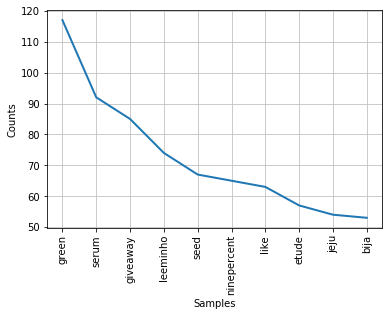

In [223]:
freq_0.plot(10)

#### Biagram 빈도 카운팅

In [224]:
print('group_0')
bigrams_0 = nltk.bigrams(corpus_0)
freq_bi_0 = nltk.FreqDist(bigrams_0)
for i,j in enumerate(freq_bi_0.most_common(20)) :
    print(f'{i}: {j}')

print('group_1')
bigrams_1 = nltk.bigrams(corpus_1)
freq_bi_1 = nltk.FreqDist(bigrams_1)
for i,j in enumerate(freq_bi_1.most_common(20)) :
    print(f'{i}: {j}')

print('group_2')
bigrams_2 = nltk.bigrams(corpus_2)
freq_bi_2 = nltk.FreqDist(bigrams_2)
for i,j in enumerate(freq_bi_2.most_common(20)) :
    print(f'{i}: {j}')
    
print('group_3')
bigrams_3 = nltk.bigrams(corpus_3)
freq_bi_3 = nltk.FreqDist(bigrams_3)
for i,j in enumerate(freq_bi_3.most_common(20)) :
    print(f'{i}: {j}')

group_0
0: (('seed', 'serum'), 59)
1: (('green', 'seed'), 58)
2: (('nine', 'percent'), 38)
3: (('vivid', 'cotton'), 24)
4: (('sleeping', 'pack'), 22)
5: (('nature', 'republic'), 20)
6: (('mineral', 'powder'), 19)
7: (('etude', 'house'), 16)
8: (('jeju', 'volcanic'), 16)
9: (('body', 'shop'), 16)
10: (('nosebum', 'mineral'), 15)
11: (('limited', 'edition'), 13)
12: (('wine', 'jelly'), 13)
13: (('good', 'luck'), 11)
14: (('rosy', 'piggy'), 11)
15: (('capsule', 'recipe'), 10)
16: (('recipe', 'pack'), 10)
17: (('update', 'ninepercent'), 10)
18: (('bija', 'cica'), 10)
19: (('piggy', 'palette'), 10)
group_1
0: (('snsd', 'yoona'), 71)
1: (('yoona', 'promotion'), 33)
2: (('promotion', 'yoona'), 29)
3: (('yoona', 'yoona'), 29)
4: (('calendar', 'wallpaper'), 25)
5: (('yoona', 'snsd'), 18)
6: (('wallpaper', 'yoona'), 13)
7: (('yoona', 'event'), 11)
8: (('mobile', 'wallpaper'), 10)
9: (('yoona', 'promo'), 7)
10: (('wechat', 'yoona'), 7)
11: (('yoona', 'real'), 7)
12: (('yoona', 'leeminho'), 7)
13:

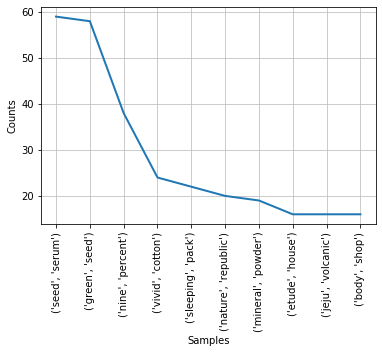

In [225]:
freq_bi_0.plot(10)

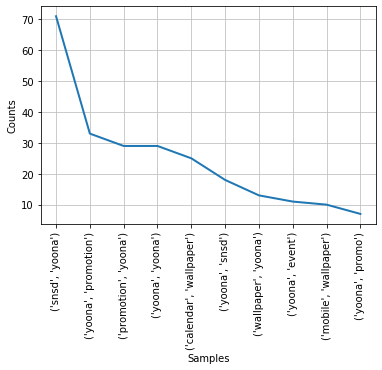

In [226]:
freq_bi_1.plot(10)

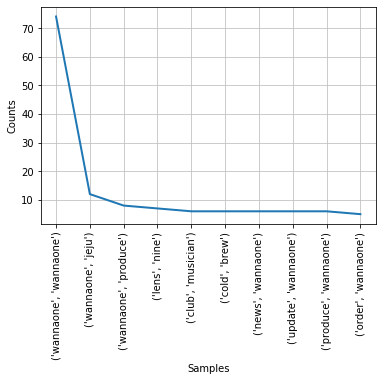

In [227]:
freq_bi_2.plot(10)

#### trigram 빈도 카운팅

In [228]:
print('group_0')
trigrams_0 = nltk.trigrams(corpus_0)
freq_tri_0 = nltk.FreqDist(trigrams_0)
for i,j in enumerate(freq_tri_0.most_common(20)) :
    print(f'{i}: {j}')

print('group_1')
trigrams_1 = nltk.trigrams(corpus_1)
freq_tri_1 = nltk.FreqDist(trigrams_1)
for i,j in enumerate(freq_tri_1.most_common(20)) :
    print(f'{i}: {j}')

print('group_2')
trigrams_2 = nltk.trigrams(corpus_2)
freq_tri_2 = nltk.FreqDist(trigrams_2)
for i,j in enumerate(freq_tri_2.most_common(20)) :
    print(f'{i}: {j}')
    
print('group_3')
trigrams_3 = nltk.trigrams(corpus_3)
freq_tri_3 = nltk.FreqDist(trigrams_3)
for i,j in enumerate(freq_tri_3.most_common(20)) :
    print(f'{i}: {j}')

group_0
0: (('green', 'seed', 'serum'), 51)
1: (('nosebum', 'mineral', 'powder'), 13)
2: (('capsule', 'recipe', 'pack'), 10)
3: (('rosy', 'piggy', 'palette'), 9)
4: (('wine', 'jelly', 'sleeping'), 9)
5: (('jelly', 'sleeping', 'pack'), 9)
6: (('update', 'nine', 'percent'), 8)
7: (('vivid', 'creamy', 'tint'), 7)
8: (('seed', 'serum', 'special'), 7)
9: (('hada', 'labo', 'hydrating'), 7)
10: (('justin', 'linyanjun', 'zhuzhengting'), 6)
11: (('whitening', 'pore', 'sleeping'), 6)
12: (('pore', 'sleeping', 'pack'), 6)
13: (('nine', 'percent', 'ninepercent'), 6)
14: (('ninepercent', 'nine', 'percent'), 6)
15: (('jeju', 'lava', 'seawater'), 5)
16: (('jeju', 'cherry', 'blossom'), 5)
17: (('linyanjun', 'zhuzhengting', 'wangziyi'), 5)
18: (('zhuzhengting', 'wangziyi', 'xiaogui'), 5)
19: (('wangziyi', 'xiaogui', 'youzhangjing'), 5)
group_1
0: (('snsd', 'yoona', 'promotion'), 32)
1: (('yoona', 'promotion', 'yoona'), 23)
2: (('yoona', 'snsd', 'yoona'), 17)
3: (('calendar', 'wallpaper', 'yoona'), 8)
4

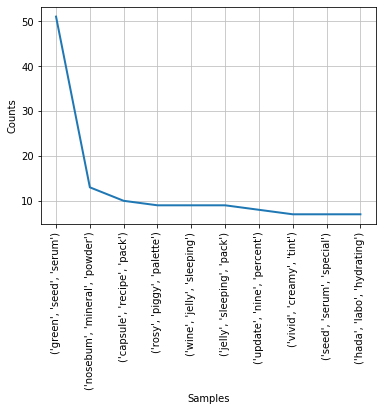

In [229]:
freq_tri_0.plot(10)

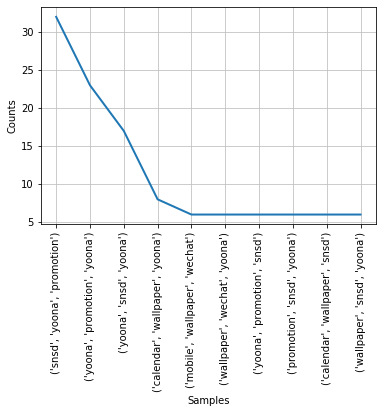

In [230]:
freq_tri_1.plot(10)

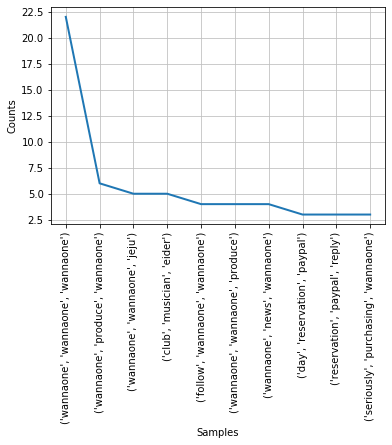

In [231]:
freq_tri_2.plot(10)